In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [8]:
chp = pd.read_csv('housing.csv')
chp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


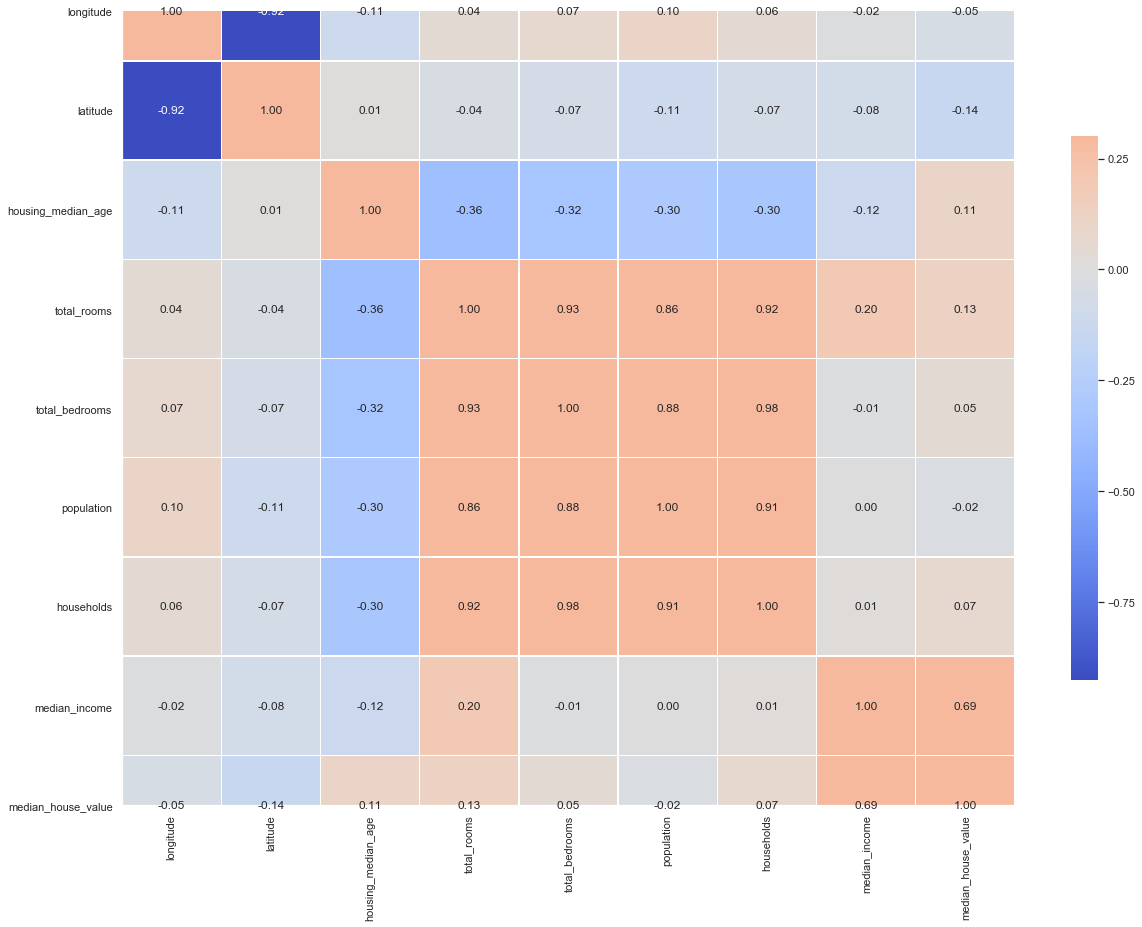

In [9]:
corr = chp.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(20,20)
    
plt.show()

A reasonably expected heatmap is shown here, such as households sharing extremely high positive correlation with population and total bedrooms, median house value and median income sharing decently high positive correlation, etc. 

In [37]:
houseValue = {"<$100000":0, "$100000-$200000":0, "$200000-$300000":0, "$300000-$400000":0, ">$400000":0}

for value in chp.median_house_value:
    if value < 100000:
        houseValue["<$100000"] += 1
    elif value <= 200000:
        houseValue["$100000-$200000"] += 1 
    elif value <= 300000:
        houseValue["$200000-$300000"] += 1 
    elif value <= 400000:
        houseValue["$300000-$400000"] += 1 
    else:
        houseValue[">$400000"] += 1 

print(houseValue)

{'<$100000': 3596, '$100000-$200000': 8335, '$200000-$300000': 4873, '$300000-$400000': 2092, '>$400000': 1744}


count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


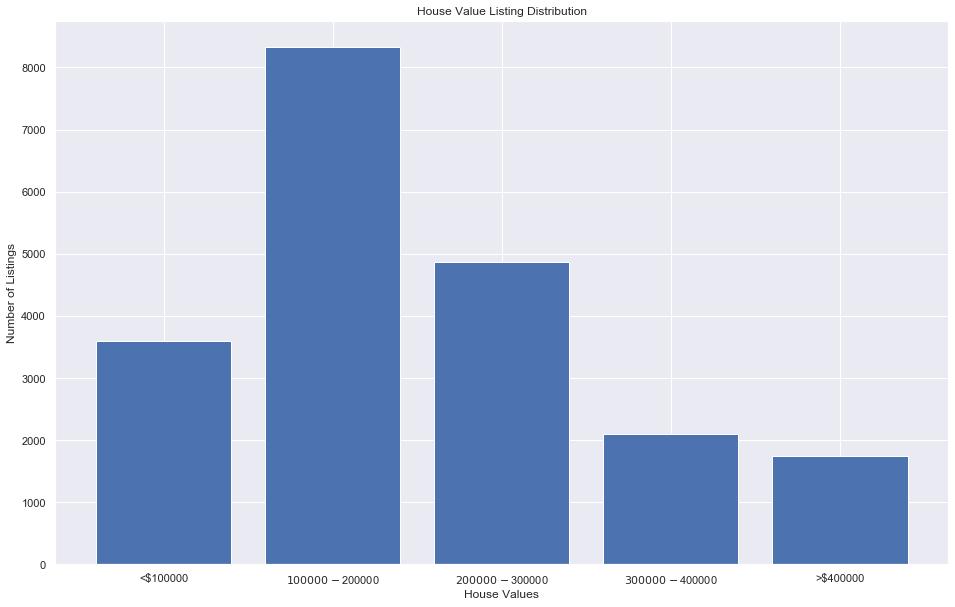

In [38]:
plt.figure(figsize=(16,10))

#x = np.arange(len(houseValue))
#width = 0.01

#fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, width, label='Inland')
#rects2 = ax.bar(x + width/2, width, label='Near Bay')

plt.bar(range(len(houseValue)), list(houseValue.values()))
plt.xticks(range(len(houseValue)), list(houseValue.keys()))
plt.ylabel('Number of Listings')
plt.xlabel('House Values')
plt.title('House Value Listing Distribution')
#plt.legend((rects1[0], rects2[0]), ('Inland', 'Near Bay'))

print(chp.median_house_value.describe())
plt.show()

In [40]:
chp['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [41]:
chp['encoded_ocean_proximity'] = chp['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],[0,1,2,3,4])
chp['streamlined_house_value'] = chp['median_house_value'].replace([],[])
chp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,encoded_ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


KeyboardInterrupt: 

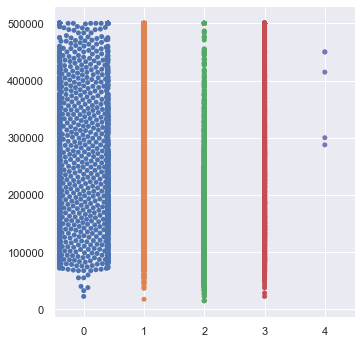

In [42]:
sns.catplot(x="encoded_ocean_proximity", y="median_house_value", data=chp, kind="swarm")